0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 3.5
0.5 0.5 4.5
0.5 0.5 4.5
0.5 0.5 4.5
0.5 0.5 4.5
0.5 0.5 4.5
0.5 0.5 4.5
0.5 0.5 4.5
0.001488095238095238


C:\Users\63976\AppData\Local\Temp\ipykernel_21956\3372132439.py:378: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if bot_:


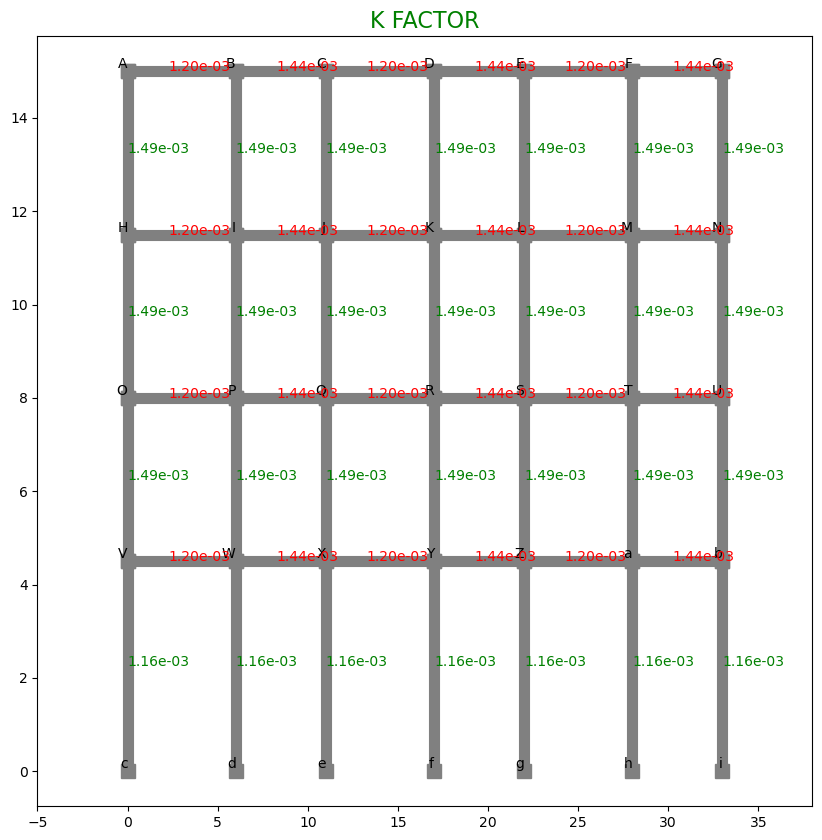

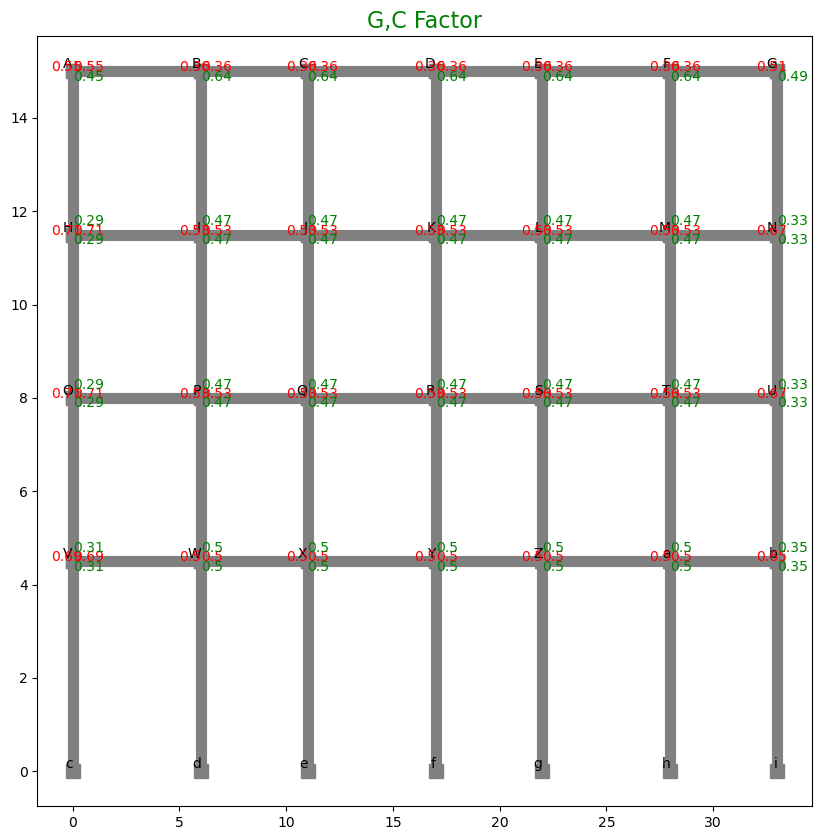

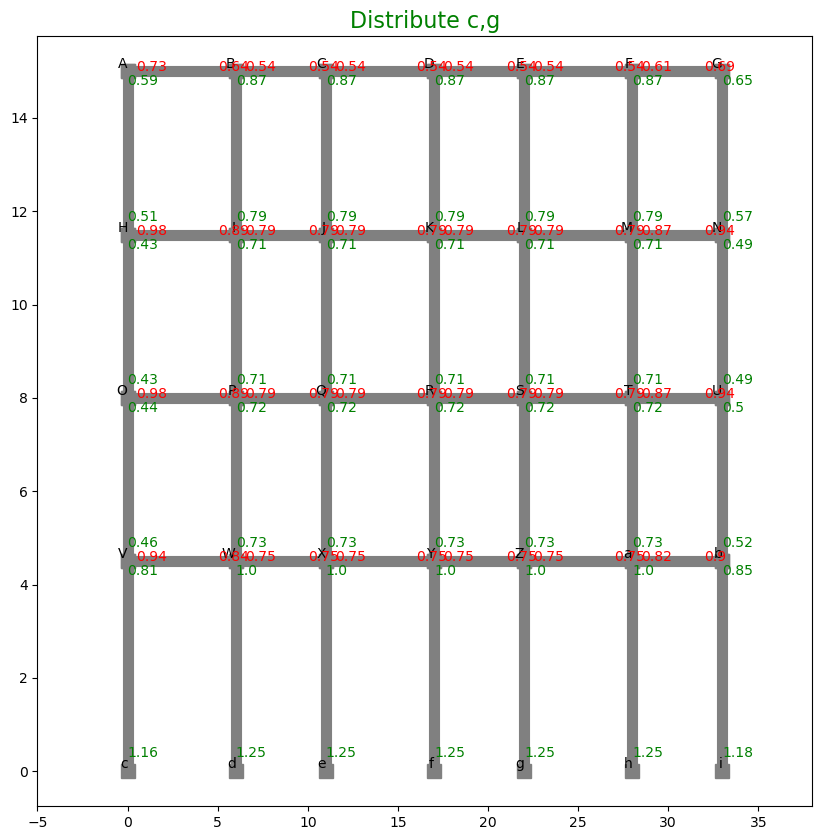

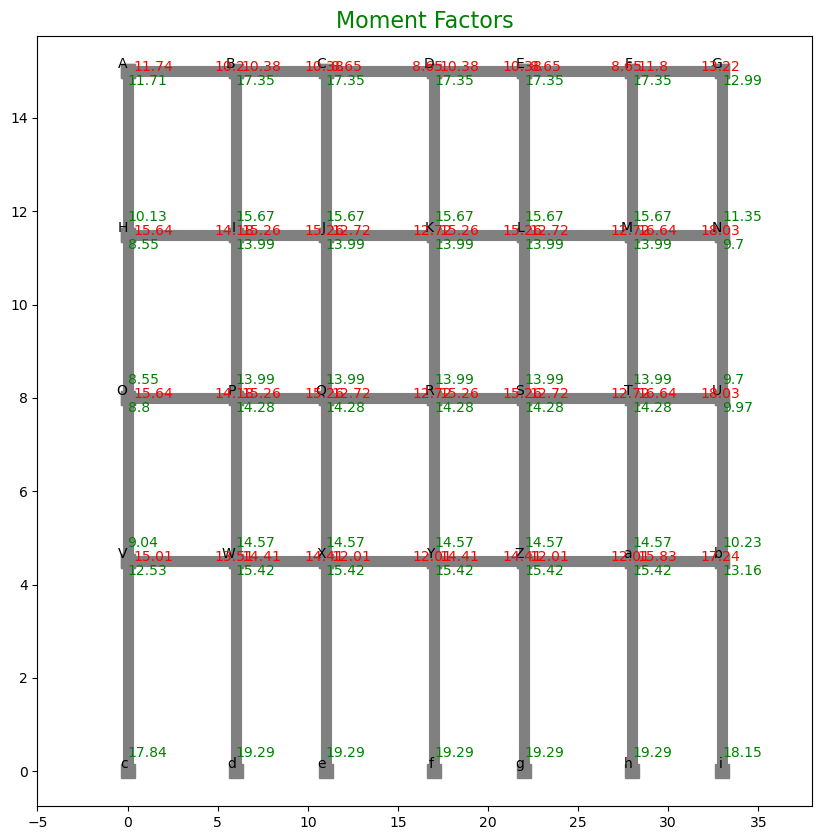

In [16]:
from handcalcs.decorator import handcalc
import numpy as np
import PLOTTER_APPROX as PLOTTER
import UTILITIES_APPROX as UTIL
import forallpeople
from pprint import pprint
import dataframe_image  as dfi
path = UTIL.create_folder("Factor Method")
testdata = {}
mode = False
# ForceList = np.insert(np.array([133.493, 212.375, 233.379]), 0, np.nan)  # bot to top
# BuildingHeightList = np.array([4, 3, 3])  # bot to top
# BuildingSpanList = np.array([6, 7, 5])  # left to right
# NanList = [(18, 10)]  # (x,y) coordinates of the NaN values

# ForceList = np.insert(np.array([30.0,60.0,90.0,120.0]), 0, np.nan)  # bot to top
# BuildingHeightList = np.array([4, 3,3,3])  # bot to top
# BuildingSpanList = np.array([4,8,6])  # left to right
# NanList = None  # (x,y) coordinates of the NaN values

# ForceList = np.insert(np.array([180,120.0]), 0, np.nan)  # bot to top
# BuildingHeightList = np.array([3.5,3.5])  # bot to top
# BuildingSpanList = np.array([7,3.5,5])  # left to right
# NanList = None  # (x,y) coordinates of the NaN values

# ForceList = np.insert(np.array([12,6.0]), 0, np.nan)  # bot to top
# BuildingHeightList = np.array([4,4])  # bot to top
# BuildingSpanList = np.array([10,6])  # left to right
# NanList = None  # (x,y) coordinates of the NaN values
ForceList = np.insert(np.array([26.04, 61.75, 92.62, 138.24]), 0, np.nan)  # bot to top
BuildingHeightList = np.array([4.5, 3.5, 3.5, 3.5])  # bot to top
BuildingSpanList = np.array([6, 5, 6, 5, 6, 5])  # left to right
NanList = None  # (x,y) coordinates of the NaN values
Name = "Frame1"

# ForceList = np.insert(np.array([2.73, 6.49, 9.72, 14.50]), 0, np.nan)  # bot to top
# BuildingHeightList = np.array([4.5, 3.5, 3.5, 3.5])  # bot to top
# BuildingSpanList = np.array([5,5,5,5,6,6,6,6])  # left to right
# NanList = None  # (x,y) coordinates of the NaN values
# Name = "Framec"

Array3d, LabelsDict = UTIL.RemoveNan(BuildingHeightList, BuildingSpanList, NanList)
ForceListCum = np.cumsum(ForceList[::-1])
Col_Coord_List = UTIL.CreateColCoordList(Array3d)
Beam_Coord_List = UTIL.CreateBeamCoordList(Array3d)
CumSpan = np.insert(np.cumsum(BuildingSpanList), 0, 0)
path = UTIL.create_folder(f"FACTOR PICTURES -{Name}")
path_dataframe = UTIL.create_folder(f"FACTOR DATAFRAMES-{Name}")
cumheight = np.cumsum(BuildingHeightList)
Dtype = UTIL.Dtype
# Create the structured array
@handcalc(override="long", jupyter_display=False, precision=5)
def AxialBeam(Col_Shear,Beam_Axial,Lateral_Force):
    Axial_Beam =  sum(Lateral_Force) -sum(Col_Shear) -  Beam_Axial  
    return Axial_Beam, 0

@handcalc(override="long", jupyter_display=False, precision=5)
def kl(b, h, length):
    I = (b * h**3) / 12
    k = I / (length)
    return k, 0


@handcalc(override="long", jupyter_display=False, precision=5)
def gfactor(k_col, k_girder):
    g = sum(k_col) / ((sum(k_col)) + sum(k_girder))
    c = 1 - g
    return g, c


@handcalc(override="long", jupyter_display=False, precision=5)
def gfactorhalfgirder(g_left, g_right):
    g_left_ = g_left + (g_right / 2)
    g_right_ = g_right + (g_left / 2)

    return g_left_, g_right_


@handcalc(override="long", jupyter_display=False, precision=5)
def gfactorhalfcol(c_bot, c_top):
    c_bot_ = c_bot + (c_top / 2)
    c_top_ = c_top + (c_bot / 2)
    return c_bot_, c_top_


@handcalc(override="long", jupyter_display=False, precision=5)
def momentfactorcol(c_bot, c_top, k):
    MomentFactor_bot = c_bot * k
    MomentFactor_top = c_top * k
    return MomentFactor_bot, MomentFactor_top


@handcalc(override="long", jupyter_display=False, precision=5)
def momentfactorBeam(g_left, g_right, k):
    MomentFactor_left = g_left * k
    MomentFactor_right = g_right * k
    return MomentFactor_left, MomentFactor_right


@handcalc(override="long", jupyter_display=False, precision=5)
def alp(Cm, f, h):
    alpha = (sum(f) * h) / sum(Cm)
    return alpha


@handcalc(override="long", jupyter_display=False, precision=5)
def MomentEndCol(MomentFactor_bot, MomentFactor_top, alpha):
    EndMoment_Bot = MomentFactor_bot * alpha
    EndMoment_Top = MomentFactor_top * alpha
    return EndMoment_Bot, EndMoment_Top


@handcalc(override="long", jupyter_display=False, precision=5)
def ShearBeam(Moment_Left, Moment_Right, Height):
    Shear = (Moment_Left + Moment_Right) / Height
    return Shear, 0


@handcalc(override="long", jupyter_display=False, precision=5)
def ShearColumn(Moment_Bot, Moment_Top, length):
    Shear = (Moment_Bot + Moment_Top) / length
    return Shear, 0


@handcalc(override="long", jupyter_display=False, precision=5)
def Shear(
    Factor_left,
    Factor_right,
    ColEndMoments,
):
    beta = sum(ColEndMoments) / (Factor_left + Factor_right)
    MomentEnd_Left = Factor_left * beta
    MomentEnd_Right = Factor_right * beta
    return MomentEnd_Left, MomentEnd_Right


@handcalc(override="long", jupyter_display=False, precision=5)
def MomentEndBeam(Factor_left,Factor_right,ColEndMoments_left,ColEndMoments_right,Moment_Factor_left,Moment_Factor_right):
    beta_left = sum(ColEndMoments_left) / sum(Factor_left)
    beta_right = sum(ColEndMoments_right) / sum(Factor_right)
    MomentEnd_Left = Moment_Factor_left * beta_left
    MomentEnd_Right = Moment_Factor_right * beta_right
    return MomentEnd_Left, MomentEnd_Right


@handcalc(override="long", jupyter_display=False, precision=5)
def AxialFactor(Axial, ShearBeam):
    Axial = sum(Axial) - sum(ShearBeam)

    return Axial, 0

@handcalc(override="long", jupyter_display=False, precision=2)
def AxialCol(BeamShear_right, BeamShear_left, ColAxial=[0]):
    axial_col = sum(BeamShear_right) + sum(ColAxial) - sum(BeamShear_left)

    return axial_col, 0


def magic(liasd):
    asfv = []
    for i, j in enumerate(liasd):
        if i < 2:
            pass
        else:
            j * -1
        asfv.append(j)
    return asfv


keyfactor0_Fig, keyfactor0_Ax, asd = PLOTTER.Frame(Array3d, ForceList, "K FACTOR")
k_factor0= np.empty(shape=(0,), dtype=Dtype)
g_factor0= np.empty(shape=(0,), dtype=Dtype)
c_factor0= np.empty(shape=(0,), dtype=Dtype)
g_half0 = np.empty(shape=(0,), dtype=Dtype)
moment_factor0 = np.empty(shape=(0,), dtype=Dtype)
moment_array = np.empty(shape=(0,), dtype=Dtype)
shear_array = np.empty(shape=(0,), dtype=Dtype)
axial_array = np.empty(shape=(0,), dtype=Dtype)

for i, j in enumerate(Col_Coord_List):
    j = j[~np.isnan(j).any(axis=(1, 2))]

    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = (
                f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            )
            member_type = "Col"
            bot = tuple(j1[0])
            top = tuple(j1[1])
            
            offsety = 0.1
            offsetx = 0.1
            scale = 1
            height = (j1[1][1]) - (j1[0][1])
            b = 0.5
            h = 0.5
            print(b, h, height)
            latexk0, asd = kl(b, h, height)
            UTIL.add_latex_data(f"Factor-k-{i}", latexk0, ColName, mode)
            k_factor = asd[0]
            k_value_col = [
                    (bot[0], bot[1], "Top", k_factor, k_factor, member_type),
                    (top[0], top[1], "Bot", k_factor, k_factor, member_type),
                ]
            k_factor0 = UTIL.AppendStructuredArray(
                    k_factor0,
                    k_value_col,
                    Dtype,
                )
            # k_factor0_col.update({tuple(j1[0]): [asd[0]]}) if k_factor0_col.get(
            #     tuple(j1[0])
            # ) is None else k_factor0_col.get(tuple(j1[0])).append(asd[0])
            # k_factor0_col.update({tuple(j1[1]): [asd[0]]}) if k_factor0_col.get(
            #     tuple(j1[1])
            # ) is None else k_factor0_col.get(tuple(j1[1])).append(asd[0])
            gtext = format(asd[0], ".2e")
            keyfactor0_Ax.text(bot[0], bot[1] + (height / 2), gtext, color="green")


for i, j in enumerate(Beam_Coord_List):
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            BeamName = (
                f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            )
            left = tuple(j1[0])
            right = tuple(j1[1])
            member_type = "Beam"
            offsety = 0.1
            offsetx = 0.1
            scale = 1
            b = 0.4
            h = 0.6
            length = j1[1][0] - j1[0][0]
            latexk0, asd = kl(b, h, length)
            UTIL.add_latex_data(f"Factor-k-g-{i}", latexk0, BeamName, mode)
            k_factor = asd[0]
            k_value_col = [
                    (left[0], left[1], "Right", k_factor, k_factor, member_type),
                    (right[0], right[1], "Left", k_factor, k_factor, member_type),
                ]
            k_factor0 = UTIL.AppendStructuredArray(
                    k_factor0,
                    k_value_col,
                    Dtype,
                )
            gtext = format(asd[0], ".2e")
            keyfactor0_Ax.text(left[0] + (height / 2), left[1], gtext, color="red")
keyfactor0_Ax.set_xlim(min(CumSpan) - 5, max(CumSpan) + 5)
keyfactor0_Fig.savefig(f"{path}\\kfactor0.png", dpi=300)
print(k_factor0["Force"].max())
# k_factor0["Force"] = k_factor0["Force"]/k_factor0["Force"].max()
k_factor0["Force"] = k_factor0["Force"]/(7.5*10**-5)
# import pandas as pd
# keyfactor0_Fig.show()
gfactor0_Fig, gfactor0_Ax, asd = PLOTTER.Frame(Array3d, ForceList, "G,C Factor")
for i, j in enumerate(Beam_Coord_List):
    peak = False
    if i == 0:
        peak = True
    for i1, j1 in enumerate(j):
            BeamName = f"NODE-{LabelsDict.get(tuple(j1[0]))}"
            left = j1[0]
            right = j1[1]
            offsety = 0.2
            offsetx = 1
            scale = 1
            b = 0.4
            h = 0.6
            height = j1[1][0] - j1[0][0]
            conditionX_moment = k_factor0["X"] == left[0]
            conditionY_moment = k_factor0["Y"] == left[1]
            condition_col = k_factor0["Type"] == "Col"
            condition_beam = k_factor0["Type"] == "Beam"
            col =k_factor0[conditionX_moment & conditionY_moment & condition_col]["Force"]
            beam = k_factor0[conditionX_moment & conditionY_moment & condition_beam]["Force"]
            latexk0, asd = gfactor(col, beam)

            UTIL.add_latex_data(f"Factor-g-{i}", latexk0, BeamName, mode)
            member_beam = "Beam"
            member_col = "Col"
            g_factor = asd[0]
            g_value_col = [
                    (left[0], left[1], "Right", g_factor, g_factor,member_beam),
                    (left[0], left[1], "Left", g_factor, g_factor, member_beam),
                ]
            gtext = round(asd[0], 2)
            gfactor0_Ax.text(left[0], left[1], gtext, color="red")
            gfactor0_Ax.text(left[0] - offsetx, left[1], gtext, color="red")
            if not peak:
                c_factor = asd[1]
                c_value_col = [
                        (left[0], left[1], "Top", c_factor, c_factor, member_col),
                        (left[0], left[1], "Bot", c_factor, c_factor, member_col),
                    ]
                cfactortext = round(asd[1], 2)
                gfactor0_Ax.text(left[0], left[1] + offsety, cfactortext, color="green")
                gfactor0_Ax.text(left[0] , left[1] - offsety, cfactortext, color="green")
            else:
                c_factor = asd[1]
                c_value_col = [
                        (left[0], left[1], "Bot", c_factor, c_factor, member_col),
                    ]
                cfactortext = round(asd[1], 2)
                # gfactor0_Ax.text(left[0], left[1] + offsety, cfactortext, color="green")
                gfactor0_Ax.text(left[0] , left[1] - offsety, cfactortext, color="green")
            g_factor0 = UTIL.AppendStructuredArray(g_factor0, g_value_col, Dtype)
            c_factor0 = UTIL.AppendStructuredArray(c_factor0, c_value_col, Dtype)
            
            
            if i1 == len(j) - 1:
                BeamName = f"NODE-{LabelsDict.get(tuple(j1[1]))}"
                conditionX_moment = k_factor0["X"] == right[0]
                conditionY_moment = k_factor0["Y"] == right[1]
                condition_col = k_factor0["Type"] == "Col"
                condition_beam = k_factor0["Type"] == "Beam"
                col =k_factor0[conditionX_moment & conditionY_moment & condition_col]["Force"]
                beam = k_factor0[conditionX_moment & conditionY_moment & condition_beam]["Force"]
                latexk0, asd = gfactor(col, beam)
                UTIL.add_latex_data(f"Factor-g-{i}", latexk0, BeamName, mode)

                g_factor = asd[0]
                g_value_col = [
                        (right[0], right[1], "Left", g_factor, g_factor, member_beam),
                    ]
                gtext = round(asd[0], 2)
                gfactor0_Ax.text(right[0] - offsetx, right[1] , gtext, color="red")
                if not peak:
                    c_factor = asd[1]
                    c_value_col = [
                            (right[0], right[1], "Top", c_factor, c_factor, member_col),
                            (right[0], right[1], "Bot", c_factor, c_factor, member_col),
                        ]
                    cfactortext = round(asd[1], 2)
                    gfactor0_Ax.text(right[0], right[1] + offsety, cfactortext, color="green")
                    gfactor0_Ax.text(right[0], right[1] - offsety, cfactortext, color="green")
                else:
                    c_factor = asd[1]
                    c_value_col = [
                            (right[0], right[1], "Bot", c_factor, c_factor, member_col),
                        ]
                    cfactortext = round(asd[1], 2)
                    # gfactor0_Ax.text(left[0], left[1] + offsety, cfactortext, color="green")
                    gfactor0_Ax.text(right[0], right[1] - offsety, cfactortext, color="green")
                g_factor0 = UTIL.AppendStructuredArray(g_factor0, g_value_col, Dtype)
                c_factor0 = UTIL.AppendStructuredArray(c_factor0, c_value_col, Dtype)



ghalf_Fig, ghalf_Ax, asd = PLOTTER.Frame(Array3d, ForceList, "Distribute c,g")
for i, j in enumerate(Col_Coord_List):
    j = j[~np.isnan(j).any(axis=(1, 2))]
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = (
                f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            )

            bot = tuple(j1[0])
            top = tuple(j1[1])

            member_type = "Col"
            offsety = 0.3
            offsetx = 0.3
            scale = 1
            height = (j1[1][1]) - (j1[0][1])
            conditionX_bot= c_factor0["X"] == bot[0]
            conditionY_bot = c_factor0["Y"] == bot[1]
            conditionX_top = c_factor0["X"] == top[0]
            conditionY_top = c_factor0["Y"] == top[1]
            condition_col = c_factor0["Type"] == "Col"
            condition_top = c_factor0["Loc"] == "Top"
            condition_bot = c_factor0["Loc"] == "Bot"
            
            bot_ = c_factor0[ conditionX_bot& conditionY_bot& condition_col& condition_top]["Force"]
            top_ = c_factor0[ conditionX_top& conditionY_top& condition_col& condition_bot]["Force"][0]
            if bot_:
                bot_ = bot_[0]
            else:
                bot_ = 1
            
            latexk0, asd = gfactorhalfcol(bot_, top_)
            UTIL.add_latex_data(f"g-halfcol-{i}", latexk0, ColName, mode)
            ghalf_bot= asd[0]
            ghalf_top = asd[1]
            ghalf_value_col = [
                            (bot[0], bot[1], "Top", ghalf_bot, ghalf_bot, member_type),
                            (top[0], top[1], "Bot", ghalf_top, ghalf_top, member_type),
                        ]

            g_half0 = UTIL.AppendStructuredArray(g_half0, ghalf_value_col, Dtype)
            ghalf_Ax.text(bot[0], bot[1]  + offsetx, round(ghalf_bot,2), color="green")
            ghalf_Ax.text(top[0], top[1]  - offsetx, round(ghalf_top,2), color="green")

for i, j in enumerate(Beam_Coord_List):
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            BeamName = (
                f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            )
            member_type = "Beam"
            left = j1[0]
            right = j1[1]
            offsety = 0.3
            offsetx = 1
            scale = 1
            height = j1[1][0] - j1[0][0]

            conditionX_left= g_factor0["X"] == left[0]
            conditionY_left = g_factor0["Y"] == left[1]
            conditionX_right = g_factor0["X"] == right[0]
            conditionY_right = g_factor0["Y"] == right[1]
            condition_col = g_factor0["Type"] == "Beam"
            condition_left = g_factor0["Loc"] == "Left"
            condition_right = g_factor0["Loc"] == "Right"

            left_ = g_factor0[ conditionX_left& conditionY_left& condition_col& condition_right]["Force"][0]
            right_ = g_factor0[ conditionX_right& conditionY_right& condition_col& condition_left]["Force"][0]

            latexk0, asd = gfactorhalfgirder(left_, right_)
            UTIL.add_latex_data(f"ghalf-beam-{i}", latexk0, BeamName, mode)
            ghalf_left= asd[0]
            ghalf_right = asd[1]
            
            ghalf_value_col =  [
                            (left[0], left[1], "Right", ghalf_left, ghalf_left, member_type),
                            (right[0], right[1], "Left", ghalf_right, ghalf_right, member_type)
                        ]

            g_half0 = UTIL.AppendStructuredArray(g_half0, ghalf_value_col, Dtype)
            ghalf_Ax.text(left[0]+ offsetx/2, left[1]  , round(ghalf_left,2), color="red")
            ghalf_Ax.text(right[0]- offsetx, right[1]  , round(ghalf_right,2), color="red")

ghalf_Ax.set_xlim(min(CumSpan) - 5, max(CumSpan) + 5)
ghalf_Fig.savefig(f"{path}\\ghalf.png", dpi=300)



Moment_Fig, Moment_Ax,asd = PLOTTER.Frame(Array3d,ForceList, "Moment Factors")
moment_factor0 = k_factor0.copy()
moment_factor0["Force"] = k_factor0["Force"] * g_half0["Force"] 

for i, j in enumerate(Col_Coord_List):
    j = j[~np.isnan(j).any(axis=(1,2))]
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            bot = j1[0]
            top = j1[1]
            offsety = 0.3
            offsetx = 0.3
            height = ((j1[1][1]) - (j1[0][1]))
            conditionX_bot = moment_factor0["X"] == bot[0]
            conditionY_bot = moment_factor0["Y"] == bot[1]
            conditionX_top = moment_factor0["X"] == top[0]
            conditionY_top = moment_factor0["Y"] == top[1]
            condition_col = moment_factor0["Type"] == "Col"
            condition_top = moment_factor0["Loc"] == "Top"
            condition_bot = moment_factor0["Loc"] == "Bot"
            bot_ = moment_factor0[ conditionX_bot& conditionY_bot& condition_col& condition_top]["Force"][0]
            top_ = moment_factor0[ conditionX_top& conditionY_top& condition_col& condition_bot]["Force"][0]
            Moment_Ax.text(bot[0] , bot[1] + offsety  , round(bot_,2),color = "green")
            Moment_Ax.text(top[0], top[1] -offsety , round(top_,2),color = "green")

for i, j in enumerate(Beam_Coord_List):
        cm_list = []
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                left = j1[0]
                right = j1[1]
                offsety = 0.3
                offsetx = 0.3
                scale = 1
                length =  j1[1][0]  - j1[0][0]
                conditionX_left= moment_factor0["X"] == left[0]
                conditionY_left = moment_factor0["Y"] == left[1]
                conditionX_right = moment_factor0["X"] == right[0]
                conditionY_right = moment_factor0["Y"] == right[1]
                condition_col = moment_factor0["Type"] == "Beam"
                condition_left = moment_factor0["Loc"] == "Left"
                condition_right = moment_factor0["Loc"] == "Right"
                left_ = moment_factor0[ conditionX_left& conditionY_left& condition_col& condition_right]["Force"][0]
                right_ = moment_factor0[ conditionX_right& conditionY_right& condition_col& condition_left]["Force"][0]

                
                Moment_Ax.text(left[0] + offsetx , left[1]  ,round(left_,2),color = "red")
                Moment_Ax.text(right[0] -offsetx *4 , right[1]  , round(right_,2),color = "red")

Moment_Ax.set_xlim(min(CumSpan)-5 ,max(CumSpan)+5)
Moment_Fig.savefig(f"{path}\\moment factors.png", dpi=300)


alphalist = []

for i,j in enumerate(Col_Coord_List[:,0,:,1]):
    bot_Y = j[0]
    top_Y = j[1]
    height_ = BuildingHeightList[::-1][i]
    floor = f"Floor-{len(BuildingHeightList)-i}"
    conditionY_bot = moment_factor0["Y"] == bot_Y
    conditionY_top = moment_factor0["Y"] == top_Y
    condition_top = moment_factor0["Loc"] == "Top"
    condition_bot = moment_factor0["Loc"] == "Bot"
    cm_bot = (moment_factor0[conditionY_bot & condition_top]["Force"])
    cm_top = (moment_factor0[conditionY_top & condition_bot]["Force"])
    cm = np.concatenate((cm_bot,cm_top))
    force_ = ForceList[::-1][:i+1]
    latexAlpha,asd = alp(cm,force_,height_)
    UTIL.add_latex_data(f"alpha-{i}",latexAlpha,BeamName,mode)
    alphalist.append(asd)

In [17]:
print(alphalist)

[2.2898621699698767, 4.58017884769362, 5.617488637992731, 6.09585440183107]


In [18]:
Moment_End_Col = {}
for i, j in enumerate(Col_Coord_List):
    j = j[~np.isnan(j).any(axis=(1,2))]
    cm_list = []
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
            bot = j1[0]
            top = j1[1]
            length = ((j1[1][1]) - (j1[0][1]))
            conditionX_bot = moment_factor0["X"] == bot[0]
            conditionY_bot = moment_factor0["Y"] == bot[1]
            conditionX_top = moment_factor0["X"] == top[0]
            conditionY_top = moment_factor0["Y"] == top[1]
            condition_col = moment_factor0["Type"] == "Col"
            condition_top = moment_factor0["Loc"] == "Top"
            condition_bot = moment_factor0["Loc"] == "Bot"
            bot_ = moment_factor0[ conditionX_bot& conditionY_bot& condition_col& condition_top]["Force"][0]
            top_ = moment_factor0[ conditionX_top& conditionY_top& condition_col& condition_bot]["Force"][0]
            alpha = alphalist[i]
            latexmomentcol,asd = MomentEndCol(bot_,top_,alpha)
            bot_value = asd[0]
            top_value = asd[1]

            member_type = "Col"
            moment_value_col = [
                    (bot[0], bot[1], "Top", bot_value, bot_value, member_type),
                    (top[0], top[1], "Bot", top_value, top_value, member_type),
                ]
            moment_array = UTIL.AppendStructuredArray(
                    moment_array,
                    moment_value_col,
                    Dtype,
                )
            UTIL.add_latex_data(f"FactorMomentCol-{i}",latexmomentcol,ColName,mode)

for i, j in enumerate(Beam_Coord_List):
    for i1, j1 in enumerate(j):
        if not np.isnan(j1).any():
            BeamName = f"NODE-{LabelsDict.get(tuple(j1[0]))}"
            left = j1[0]
            right = j1[1]
            offsety = 0.2
            offsetx = 1
            scale = 1
            conditionX_left_moment = moment_array["X"] == left[0]
            conditionY_left_moment = moment_array["Y"] == left[1]
            conditionX_right_moment = moment_array["X"] == right[0]
            conditionY_right_moment = moment_array["Y"] == right[1]
            condition_col_moment = moment_array["Type"] == "Col"

            conditionX_left_moment_factor = moment_factor0["X"] == left[0]
            conditionY_left_moment_factor = moment_factor0["Y"] == left[1]
            conditionX_right_moment_factor = moment_factor0["X"] == right[0]
            conditionY_right_moment_factor = moment_factor0["Y"] == right[1]
            condition_col_moment_factor = moment_factor0["Type"] == "Beam"
            condition_left_moment_factor = moment_factor0["Loc"] == "Left"
            condition_right_moment_factor = moment_factor0["Loc"] == "Right"
            
            
            left_array = moment_factor0[ conditionX_left_moment_factor& conditionY_left_moment_factor& condition_col_moment_factor]["Force"]
            right_array = moment_factor0[ conditionX_right_moment_factor& conditionY_right_moment_factor& condition_col_moment_factor]["Force"]

            left_ = moment_factor0[ conditionX_left_moment_factor& conditionY_left_moment_factor& condition_col_moment_factor& condition_right_moment_factor]["Force"][0]
            right_ = moment_factor0[ conditionX_right_moment_factor& conditionY_right_moment_factor& condition_col_moment_factor& condition_left_moment_factor]["Force"][0]
            col_end_moments_left = moment_array[conditionX_left_moment& conditionY_left_moment& condition_col_moment]["Force"]
            col_end_moments_right = moment_array[conditionX_right_moment& conditionY_right_moment& condition_col_moment]["Force"]

            print(left_array,right_array,col_end_moments_left,col_end_moments_right,left_,right_)


            latexk0,asd = MomentEndBeam(left_array,right_array,col_end_moments_left,col_end_moments_right,left_,right_)
            
            UTIL.add_latex_data(f"FactorMomentsBeams-{i}",latexk0,BeamName,mode)
            left_value = asd[0]
            right_value = asd[1]
            member_type = "Beam"
            moment_value_beam = [
                    (left[0], left[1], "Right", left_value, left_value, member_type),
                    (right[0], right[1], "Left", right_value, right_value, member_type),
                ]
            moment_array = UTIL.AppendStructuredArray(
                    moment_array,
                    moment_value_beam,
                    Dtype,
                )


for i, j in enumerate(Beam_Coord_List):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                left = j1[0]
                right = j1[1]
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                conditionX_left = moment_array["X"] == left[0]
                conditionY_left = moment_array["Y"] == left[1]
                conditionX_right = moment_array["X"] == right[0]
                conditionY_right = moment_array["Y"] == right[1]
                condition_beam = moment_array["Type"] == "Beam"
                condition_left = moment_array["Loc"] == "Left"
                condition_right = moment_array["Loc"] == "Right"
                moment_left = moment_array[conditionX_left & conditionY_left & condition_beam &condition_right]["Force"][0]
                moment_right = moment_array[conditionX_right & conditionY_right & condition_beam &condition_left]["Force"][0]

                LatexBeamAxial, asd = ShearBeam(moment_left,moment_right,length)
                shear_value = asd[0]

                UTIL.add_latex_data(f"Factor-Beam-{i}",LatexBeamAxial,BeamName)
                member_type = "Beam"
                shear_value_beam = [
                        (left[0], left[1], "Right", shear_value, shear_value, member_type),
                        (right[0], right[1], "Left", shear_value, shear_value, member_type),
                    ]
                shear_array = UTIL.AppendStructuredArray(
                        shear_array,
                    shear_value_beam,
                    Dtype,
                )

                

for i, j in enumerate(Col_Coord_List):
        j = j[~np.isnan(j).any(axis=(1,2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                bot = j1[0]
                top = j1[1]
                ColName = f"COLUMN-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                height = ((j1[1][1]) - (j1[0][1]))
                conditionX_bot = moment_array["X"] == bot[0]
                conditionY_bot = moment_array["Y"] == bot[1]
                conditionX_top = moment_array["X"] == top[0]
                conditionY_top = moment_array["Y"] == top[1]
                condition_col = moment_array["Type"] == "Col"
                condition_bot = moment_array["Loc"] == "Bot"
                condition_top = moment_array["Loc"] == "Top"
                moment_bot = moment_array[conditionX_bot & conditionY_bot & condition_col &condition_top]["Force"][0]
                moment_top = moment_array[conditionX_top & conditionY_top & condition_col &condition_bot]["Force"][0]



                LatexColAxial, asd = ShearColumn(moment_bot,moment_top,height)
                shear_value = asd[0]

                UTIL.add_latex_data(f"Factor-Col-{i}",LatexColAxial,ColName)
                member_type = "Col"
                shear_value_col = [
                        (bot[0], bot[1], "Top", shear_value, shear_value, member_type),
                        (top[0], top[1], "Bot", shear_value, shear_value, member_type),
                    ]
                shear_array = UTIL.AppendStructuredArray(
                        shear_array,
                    shear_value_col,
                    Dtype,
                )
    
for i, j in enumerate(Col_Coord_List):
        j = j[~np.isnan(j).any(axis=(1, 2))]
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                title_calculation = f"Portal-Axial-{i}"
                member_type = "Col"
                bot = j1[0]
                top = j1[1]

                Col_Name = (
                    f"COLUMN-{LabelsDict.get(tuple(top))}-{LabelsDict.get(tuple(bot))}"
                )
                length = (j1[1][1] - j1[0][1]) * m
                conditionX_moment = axial_array["X"] == top[0]
                conditionY_moment = axial_array["Y"] == top[1]

                conditionX_shear = shear_array["X"] == top[0]
                conditionY_shear = shear_array["Y"] == top[1]

                condition_col = axial_array["Type"] == "Col"
                condition_beam = shear_array["Type"] == "Beam"

                condition_right = shear_array["Loc"] == "Right"
                condition_left = shear_array["Loc"] == "Left"

                col_axial = axial_array[
                    conditionX_moment & conditionY_moment & condition_col
                ]["ForceUnits"]
                beam_shear_right = shear_array[
                    conditionX_shear
                    & conditionY_shear
                    & condition_beam
                    & condition_right
                ]["ForceUnits"]
                beam_shear_left = shear_array[
                    conditionX_shear
                    & conditionY_shear
                    & condition_beam
                    & condition_left
                ]["ForceUnits"]
                LatexCol, asd = AxialCol(beam_shear_right, beam_shear_left, col_axial)
                axial, moment = asd
                UTIL.add_latex_data(title_calculation, LatexCol, Col_Name)
                axial_value = [
                    (bot[0], bot[1], "Top", axial, axial, member_type),
                    (top[0], top[1], "Bot", axial, axial, member_type),
                ]
                axial_array = UTIL.AppendStructuredArray(
                    axial_array,
                    axial_value,
                    Dtype,
                )

for i, j in enumerate(Beam_Coord_List):
        for i1, j1 in enumerate(j):
            if not np.isnan(j1).any():
                BeamName = f"BEAM-{LabelsDict.get(tuple(j1[0]))}-{LabelsDict.get(tuple(j1[1]))}"
                left = j1[0]
                right = j1[1]
                length = j1[1][0]  - j1[0][0] 
                # BeamList = BeamShear.get(tuple(j1[0]))
                conditionX_left_axial = axial_array["X"] == left[0]
                conditionY_left_axial = axial_array["Y"] == left[1]
                conditionX_right_axial = axial_array["X"] == right[0]
                conditionY_right_axial = axial_array["Y"] == right[1]
                condition_beam_axial = axial_array["Type"] == "Beam"
                condition_left_axial = axial_array["Loc"] == "Left"
                condition_right_axial = axial_array["Loc"] == "Left"

                conditionX_left_shear = shear_array["X"] == left[0]
                conditionY_left_shear = shear_array["Y"] == left[1]
                conditionX_right_shear = shear_array["X"] == right[0]
                conditionY_right_shear = shear_array["Y"] == right[1]
                condition_beam_shear = shear_array["Type"] == "Col"
                condition_left_shear = shear_array["Loc"] == "Left"
                condition_right_shear = shear_array["Loc"] == "Right"
                try:
                    axial_beam_right = axial_array[conditionX_left_axial&conditionY_left_axial&condition_beam_axial&condition_right_axial]["Force"][0]
                except:
                     axial_beam_right = 0
                shear_col = shear_array[conditionX_left_shear&conditionY_left_shear&condition_beam_shear]["Force"]
                print(shear_col)
                lateral_force = ForceList[::-1][:i+1] if i1 == 0 else [0]
                    


                LatexBeamAxial, asd = AxialBeam(shear_col,axial_beam_right,lateral_force)
                axial_value = asd[0] 

                UTIL.add_latex_data(f"Axial-Beam-Factor{i}",LatexBeamAxial,BeamName,mode)
                member_type = "Beam"
                axial_array_value = [
                        (left[0], left[1], "Right", axial_value, axial_value, member_type),
                        (right[0], right[1], "Left", axial_value, axial_value, member_type),
                    ]
                axial_array = UTIL.AppendStructuredArray(
                        axial_array,
                    axial_array_value,
                    Dtype,
                )



[11.74123489] [10.1963759  10.38182028] [26.8097591] [39.73432865] 11.741234892029988 10.196375895663165
[10.1963759  10.38182028] [10.38182028  8.6515169 ] [39.73432865] [39.73432865] 10.381820279155612 10.381820279155612
[10.38182028  8.6515169 ] [ 8.6515169  10.38182028] [39.73432865] [39.73432865] 8.651516899296343 8.651516899296343
[ 8.6515169  10.38182028] [10.38182028  8.6515169 ] [39.73432865] [39.73432865] 10.381820279155612 10.381820279155612
[10.38182028  8.6515169 ] [ 8.6515169  11.80005561] [39.73432865] [39.73432865] 8.651516899296343 8.651516899296343
[ 8.6515169  11.80005561] [13.21829094] [39.73432865] [29.75111277] 11.800055607581486 13.218290936007362
[15.64195234] [14.18014185 15.26199763] [23.19619442 39.16914636] [35.88493854 64.07745547] 15.641952336856823 14.180141845891528
[14.18014185 15.26199763] [15.26199763 12.71833135] [35.88493854 64.07745547] [35.88493854 64.07745547] 15.26199762591148 15.26199762591148
[15.26199763 12.71833135] [12.71833135 15.26199763]

posx and posy should be finite values
posx and posy should be finite values


array([( 0., 11.5, 'Top',  23.19619442, 23.19619441509157, 'Col'),
       ( 0., 15. , 'Bot',  26.8097591 , 26.8097590983997, 'Col'),
       ( 6., 11.5, 'Top',  35.88493854, 35.88493853658345, 'Col'),
       ( 6., 15. , 'Bot',  39.73432865, 39.734328654900885, 'Col'),
       (11., 11.5, 'Top',  35.88493854, 35.88493853658345, 'Col'),
       (11., 15. , 'Bot',  39.73432865, 39.734328654900885, 'Col'),
       (17., 11.5, 'Top',  35.88493854, 35.88493853658345, 'Col'),
       (17., 15. , 'Bot',  39.73432865, 39.734328654900885, 'Col'),
       (22., 11.5, 'Top',  35.88493854, 35.88493853658345, 'Col'),
       (22., 15. , 'Bot',  39.73432865, 39.734328654900885, 'Col'),
       (28., 11.5, 'Top',  35.88493854, 35.88493853658345, 'Col'),
       (28., 15. , 'Bot',  39.73432865, 39.734328654900885, 'Col'),
       (33., 11.5, 'Top',  25.98659776, 25.986597755159305, 'Col'),
       (33., 15. , 'Bot',  29.75111277, 29.751112773927744, 'Col'),
       ( 0.,  8. , 'Top',  39.16914636, 39.1691463599796

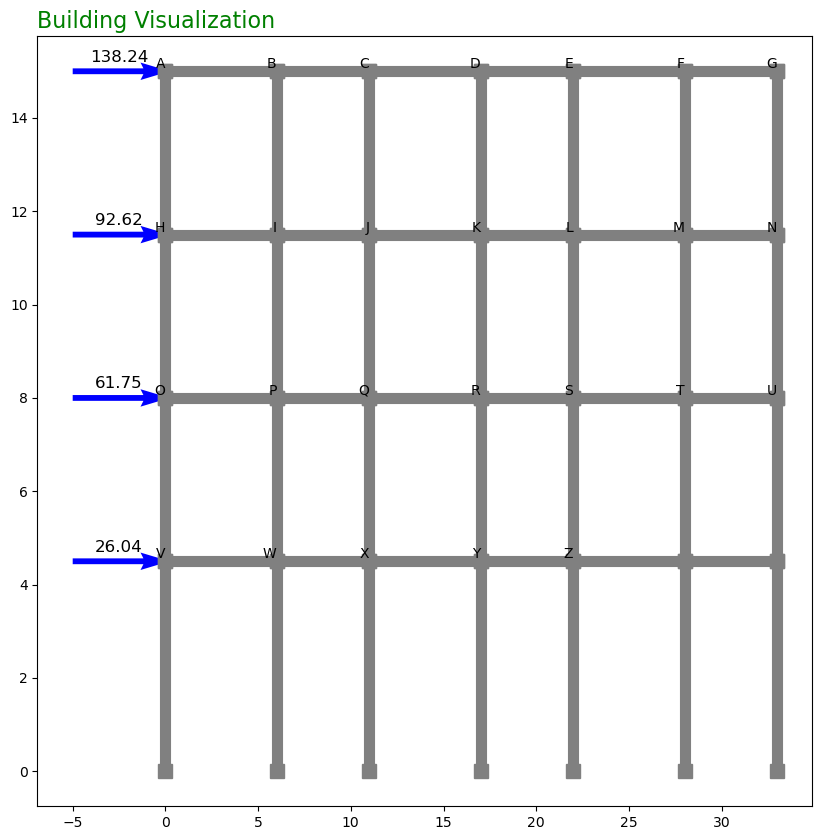

posx and posy should be finite values


0.0 11.5
6.0 11.5
11.0 11.5
17.0 11.5
22.0 11.5
28.0 11.5
33.0 11.5
0.0 8.0
6.0 8.0
11.0 8.0
17.0 8.0
22.0 8.0
28.0 8.0
33.0 8.0
0.0 4.5
6.0 4.5
11.0 4.5
17.0 4.5
22.0 4.5
28.0 4.5
33.0 4.5
0.0 0.0
6.0 0.0
11.0 0.0
17.0 0.0
22.0 0.0
28.0 0.0
33.0 0.0


,X,Y,Loc,Moment,Type
0,0.0,11.5,Top,23.196194,Col
1,0.0,15.0,Bot,26.809759,Col
2,6.0,11.5,Top,35.884939,Col
3,6.0,15.0,Bot,39.734329,Col
4,11.0,11.5,Top,35.884939,Col
...,...,...,...,...,...
99,22.0,4.5,Left,95.940231,Beam
100,22.0,4.5,Right,79.950193,Beam
101,28.0,4.5,Left,75.896996,Beam
102,28.0,4.5,Right,99.993428,Beam


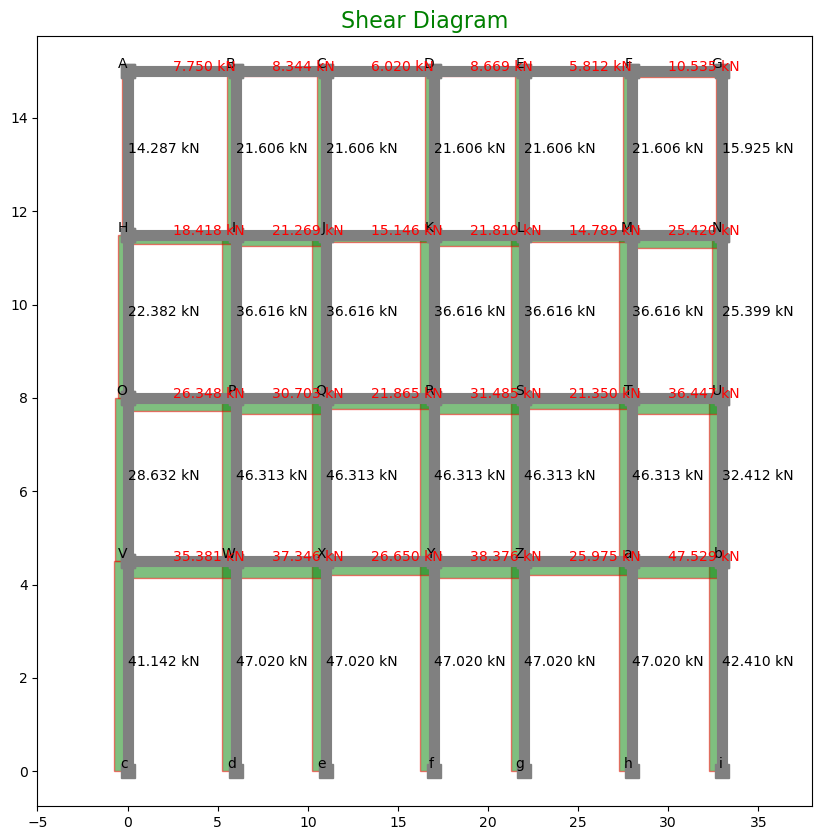

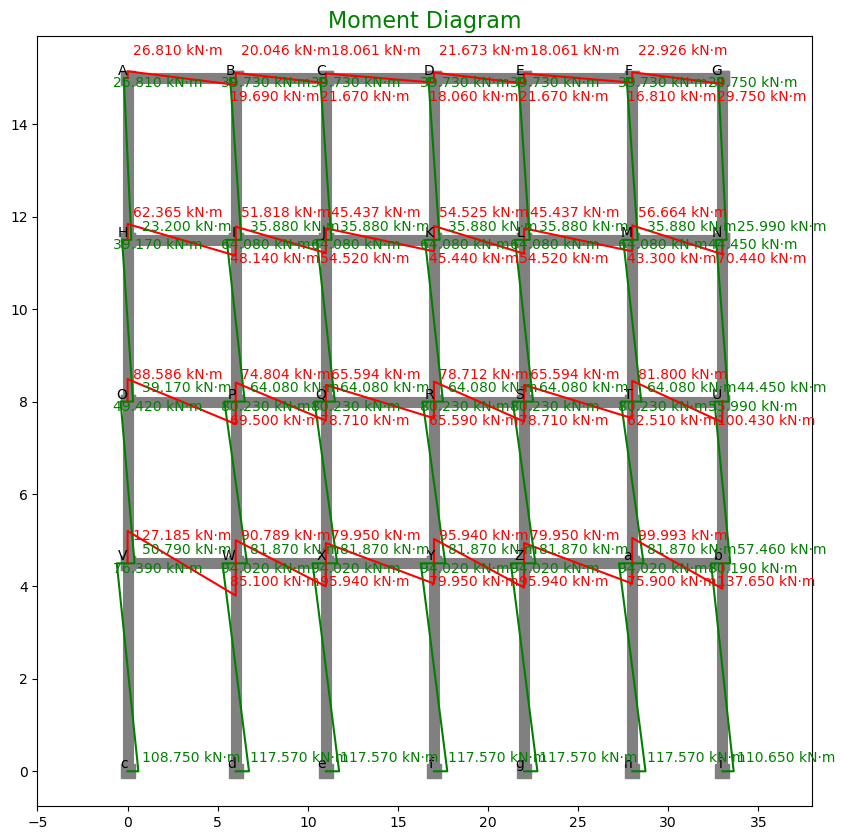

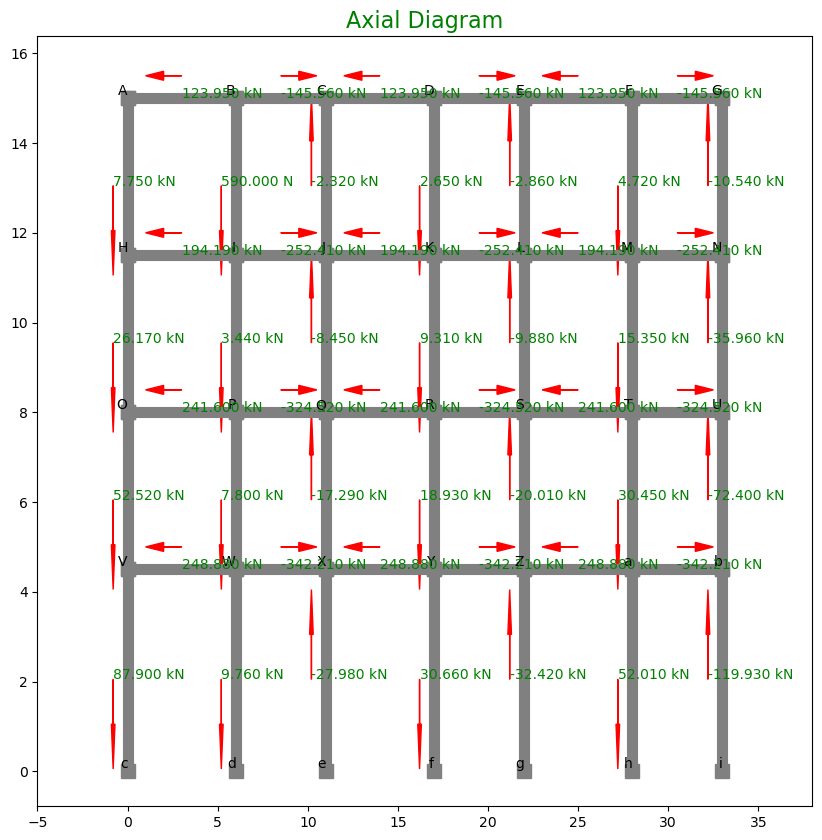

In [19]:
pprint(moment_array)
# pprint(shear_array)
# pprint(axial_array)
import matplotlib.patches as patches

ColShear_Fig, ColMoment_Fig, ColAxial_Fig = PLOTTER.PortalPlot(
            Array3d,
            BuildingSpanList,
            BuildingHeightList,
            ForceList,
            Col_Coord_List,
            Beam_Coord_List,
            moment_array,
            shear_array,
            axial_array,
            subfolder=f"FACTOR PICTURES - {Name}",
        )
import pandas as pd
k_factor0_pd = pd.DataFrame(k_factor0)
k_factor0_pd = k_factor0_pd.rename(columns={'Force': "Value"})
k_factor0_pd = k_factor0_pd.drop('ForceUnits', axis=1)

g_factor0_pd = pd.DataFrame(g_factor0)
g_factor0_pd = g_factor0_pd.rename(columns={'Force': "Value"})
g_factor0_pd = g_factor0_pd.drop('ForceUnits', axis=1)

c_factor0_pd = pd.DataFrame(c_factor0)
c_factor0_pd = c_factor0_pd.rename(columns={'Force': "Value"})
c_factor0_pd = c_factor0_pd.drop('ForceUnits', axis=1)


g_half0_pd = pd.DataFrame(g_half0)
g_half0_pd = g_half0_pd.rename(columns={'Force': "Value"})
g_half0_pd = g_half0_pd.drop('ForceUnits', axis=1)

moment_factor0_pd = pd.DataFrame(moment_factor0)
moment_factor0_pd = moment_factor0_pd.rename(columns={'Force': "Value"})
moment_factor0_pd = moment_factor0_pd.drop('ForceUnits', axis=1)


moment_array_pd = pd.DataFrame(moment_array)
moment_array_pd = moment_array_pd.rename(columns={'Force': "Moment"})
moment_array_pd = moment_array_pd.drop('ForceUnits', axis=1)

shear_array_pd = pd.DataFrame(shear_array)
shear_array_pd = shear_array_pd.rename(columns={'Force': "Shear"})
shear_array_pd = shear_array_pd.drop('ForceUnits', axis=1)
axial_array_pd = pd.DataFrame(axial_array)
axial_array_pd = axial_array_pd.rename(columns={'Force': "Axial"})
axial_array_pd = axial_array_pd.drop('ForceUnits', axis=1)
k_factor0_pd.to_csv(f"{path_dataframe}\\k_factor0.csv")
g_factor0_pd.to_csv(f"{path_dataframe}\\g_factor0.csv")
c_factor0_pd.to_csv(f"{path_dataframe}\\c_factor0.csv")
g_half0_pd.to_csv(f"{path_dataframe}\\g_half0.csv")
moment_factor0_pd.to_csv(f"{path_dataframe}\\moment_factor0.csv")
moment_array_pd.to_csv(f"{path_dataframe}\\moment_array.csv")
shear_array_pd.to_csv(f"{path_dataframe}\\shear_array.csv")
axial_array_pd.to_csv(f"{path_dataframe}\\axial_array.csv")



display(moment_array_pd)


In [20]:
UTIL.html_makerl()

UTIL.selenium_screenshot(subfolder=f"FACTOR SOLUTIONS -{Name}")